In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gatspy.periodic import LombScargleMultiband
from chunking import getObjDf

%matplotlib inline

In [2]:
test_meta = pd.read_csv('/modules/cs342/Assignment2/test_set_metadata.csv',header=0)
train_meta = pd.read_csv('/modules/cs342/Assignment2/training_set_metadata.csv',header=0)
train_data = pd.read_csv('/modules/cs342/Assignment2/training_set.csv',header=0)

In [3]:
colours = ["b","g","r","c","m","y","k","w"]
colourMap = {i:j for i, j in enumerate(colours)}

In [4]:
galactic_bool = test_meta["hostgal_photoz"] == 0.0
gal_slice = test_meta[galactic_bool]
ex_gal_slice = test_meta[~galactic_bool]

In [5]:
numGalactic = gal_slice.shape[0]
numExtra = ex_gal_slice.shape[0]

In [52]:
# graph showing the light curvge of an object as a scatter graph
# toggle 1: produces phase light curve graph, toggle 0: produces normal light curve graph
def objectLcurve(objId,toggle):
    phase = None
#     used for labeling graph
    pb = {0:"u",1:"g",2:"r",3:"i",4:"z",5:"Y"} 
    
    obj = train_data[train_data["object_id"] == objId]
    if toggle == 1:
        period = calcPeriod(objId,0)
        phase = (obj['mjd']/period) % 1
        
    if phase is None:
        phase = []
    if len(phase) != len(obj):
        phase = obj['mjd']
        xlabel = 'MJD'
    else:
        xlabel = 'Phase'   
    plt.figure(figsize=(8, 5))
    plt.ylabel("Flux")
    plt.xlabel(xlabel)
    plt.title("Light Curve Object " + str(objId))

    for i in range(6):
        temp1 = phase[obj["passband"] == i]
        temp2 = obj[obj["passband"] == i]
        plt.scatter(temp1,temp2['flux'],marker='.',label=pb[i], alpha = 0.6)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [53]:
# prints out the first n objects light curves fromm a specified class
def classLcurve(classNum, numCurves, toggle):
    cls = train_meta[train_meta["target"] == classNum]
    count= 0
    for i in cls["object_id"]:
        if count == numCurves:
            break
        if toggle == 1: objectLcurve(i,1)
        else: objectLcurve(i,None)
        count+=1

In [54]:
def calcPeriod(objId,show) :
    obj = train_data[train_data['object_id']== objId]
    model = LombScargleMultiband(fit_period=True)

    Pmin = max(np.median(np.diff(sorted(obj['mjd']))), 0.1)
    Pmax = min(10., (obj['mjd'].max() - obj['mjd'].min())/2.)
    model.optimizer.set(period_range=(Pmin, Pmax), first_pass_coverage=5)
    model.fit(obj['mjd'], obj['flux'], dy=obj['flux_err'], filts=obj['passband'])
    return model.best_period
    if show == 1:print "object 615 has a period of "+str(period)+" days"

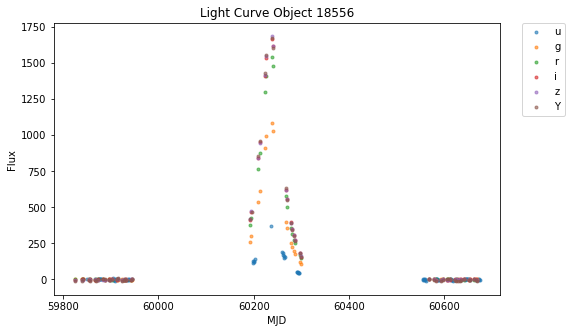

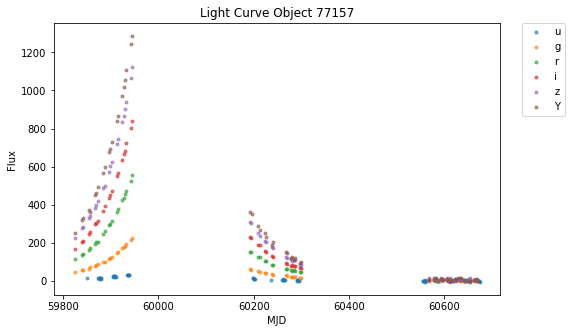

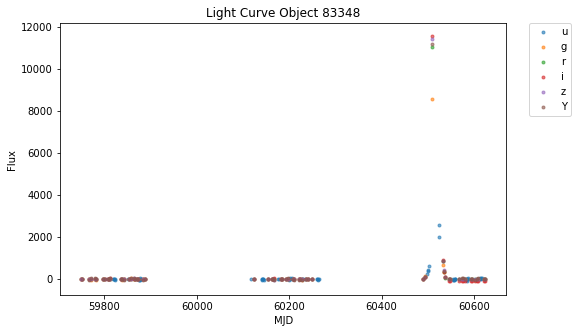

In [85]:
classLcurve(6,3,0)

In [63]:
def getTrainMeta(objId):
    dfList = []
    for id in objid:
        dfList.append(train_meta[train_meta['object_id'] == id])
    pd.concat(dfList)

In [64]:
def getObjInClass(classId):
    return train_meta[train_meta['target']==classId]

Finding optimal frequency:
 - Estimated peak width = 0.00736
 - Using 5 steps per peak; omega_step = 0.00147
 - User-specified period range:  0.1 to 10
 - Computing periods at 42260 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


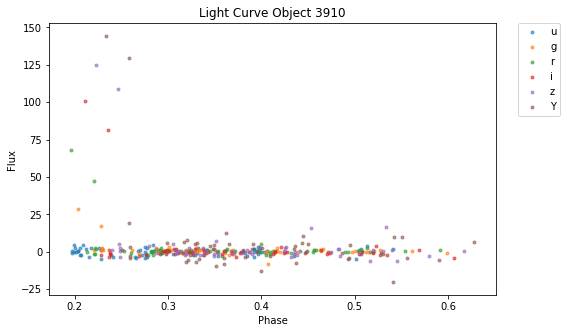

In [84]:
classLcurve(62,1,1)